# The Beta-Bernoulli Update

This is a simple problem to try out the basic paradigm of Bayesian ML, which we write as 
$$\text{posterior} = \frac{\text{likelihood}\times\text{prior}}{\text{evidence}}.$$
Let's say we are given a biased coin, and we want to find out the probability that the coin lands heads vs tails. To do this in a Bayesian way, we need a few things. 

### Generative Model

Firstly, we need a model to generate coin flips/data. Our model will be that the coin is generated from a Bernoulli distribution with some probability $\theta$, so that a sequence of flips $X_i$ we have 
$$X_i\sim \text{Bern}(\theta)\hspace{0.5cm}\text{ i.i.d.}$$
Note: we expect coin flips to be uncorrelated, but for other problems (e.g. sentiment analysis) we might expect correllation and may want to include that in our model.

### Prior Distribution

Now, we need a prior distribution on the parameters $\theta$ of the Bernoulli random variables. A natural distribution to work with is the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) – we will find out why. We will take $\theta\sim \text{Beta}(\alpha,\beta)$ so that
$$p(\theta) = \frac{1}{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}.$$
Here $B(\alpha,\beta)$ is the [Beta function](https://en.wikipedia.org/wiki/Beta_function). 

<!-- We will actually make a particular choice of prior; we will take $\alpha=\beta=1$ (notice that this will cause the prior to be a uniform distribution on $[0,1]$). -->

### Likelihood.

Now, suppose we have flipped the coin some number of times and we have observed $\mathcal{D} = X_1,X_2,\ldots,X_n$. Let $N_1$ be the number of ones we observed and $N_0$ be the number of zeroes. We can then compute the likelihood of this sequence given some specific $\theta$ to be 
$$p(\mathcal{D}\mid \theta) = \theta^{N_1}(1-\theta)^{N_0}.$$

### Posterior

Here is where we find out why the prior distribution that we chose was smart. The posterior is 
$$p(\theta\mid \mathcal{D})=\frac{1}{Z}p(\theta)p(\mathcal{D}\mid\theta) = \theta^{\alpha-1}(1-\theta)^{\beta-1}\theta^{N_1}(1-\theta)^{N_0}$$
from which we can conclude that $(\theta\mid\mathcal{D})\sim\text{Beta}(\alpha + N_1, \beta + N_0)$

### Evidence

In the posterior we swept something under the rug by introducing a normalization constant, $Z$. It turns out that $Z=B(\alpha+N_1,\beta+N_0)$ because it must be the normalization constant for the Beta distribution. This constant is sometimes called the evidence, which is denoted $p(\mathcal{D})$. We could think about this as the probability of seeing the data given our entire model.

## How does this fit together?

Let's implement this now! We will give ourselves a coin, which has a ground truth bias, $p$, and we will try to learn that bias one step at a time.


In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

rng = np.random.default_rng()

In [2]:
def Bern(p):
    """ flips a coin with weight p. p should be a number in [0,1] """
    return 1 if rng.random() < p else 0


In [7]:
from IPython.display import display, clear_output

def learn_p(p, n=150, plot=True):
    fig, ax = plt.subplots()
    X = np.linspace(0,1,201)
    alpha = beta = 1
    
    for step in range(n):
        if plot == True:
            Y = st.beta.pdf(X, alpha, beta)
            ax.cla()
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 12)
            ax.set_title(f"step={step}, N1 = {alpha-1}, N0 = {beta-1}")
            ax.plot(X, Y)
            ax.plot([p,p],[0,12],'r')
            display(fig)
            clear_output(wait = True)
            plt.pause(0.01)
        
        flip = Bern(p)
        beta += (1-flip)
        alpha += flip
        
    ax.cla()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 12)
    ax.set_title(f"step={step}, N1 = {alpha-1}, N0 = {beta-1}")
    ax.plot(X, Y)
    ax.plot([p,p],[0,12],'r')
    display(fig)
    
    print(f"""The maximum a posteriori (MAP) estimate for the true probability is {(alpha-1)/(alpha+beta-2)}
The mean estimate for the true probability is {alpha/(alpha+beta)}
The median estimate for the true probability is (rougly) {(alpha-1/3)/(alpha+beta-2/3)}""")
    return alpha, beta
        

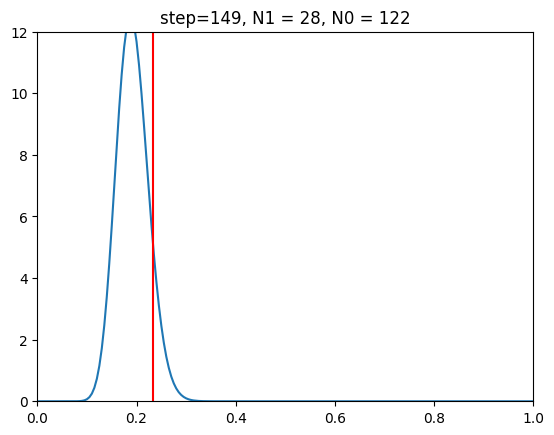

The Maximum a Posteriori estimate for the true probability is 0.18666666666666668
The mean estimate for the true probability is 0.19078947368421054
The median estimate for the true probability is (rougly) 0.1894273127753304


(29, 123)

In [6]:
learn_p(0.2331)